# DA Final project:

## Group 43

# <b id='Read-data'>43. Foodborne</b> <b style='color: #40E0D0'>Disease Outbreaks, 1998-2015</b>
Link to the data source - https://www.kaggle.com/datasets/cdc/foodborne-diseases

###  Name of students:
Liron Zamir<br>
Noy Benhamu<br>
Amit Kroitor<br>


<div>
<img src="https://github.com/LironZamir1006/Foodborne-Disease/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%AA%20%D7%A9%D7%A2%D7%A8%20%D7%98%D7%95%D7%91%D7%94.png?raw=true">
</div>


# <b> </b> <b style='color:bleck'>About Dataset</b>


# <b> </b> <b style='color:#40E0D0'>Context</b>

The data file provides information on cases of respiratory diseases by one or more outbreaks and caused by the same neglected food or drink. The information covers a period of time from 1998 to 2015, and includes details such as year, country, location where the preparation was made, the food being reported, the food family that was infected with it, the cause (hallucination, bacterial poisoning or a chemical substance) that caused the disease, condition (whether the cause is confirmed or suspected ), the total number of patients, hospitals, and deceased. During many disease investigations, no specific food vehicle is identified; For these cases, the food variable is empty.RS).on

___
#  <b id="introductions"> </b> <b style='color:black'>Introduction </b> <b> &  Basic <b style='color:#40E0D0'>EDA. </b>  


<b id="Top"> </b>  

1. [Importing Libraries.](#1)
2. [Read Data.](#2)
3. [EDA Project.](#3)
4. [conditional selection](#4)


---

<div style="color:white;display:fill;border-radius:100px;
            background-color:#03112A;font-size:10%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 5px; padding-top: 5px; padding-bottom: 10px;"><b><b><span style='color:#2ae4f5''></span></b>   </b></p>
</div>

## <b>1.Importing </b> <b style='color:#40E0D0'>Libraries.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import date

## <b id='Read-data'>2.Read </b> <b style='color: #40E0D0'>Data.</b>

In [2]:
url = 'https://raw.githubusercontent.com/LironZamir1006/Foodborne-Disease/main/Foodborne%20Disease%20Outbreaks%2C%201998-2015.csv'
food_df = pd.read_csv(url)

In [3]:
food_df.tail()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0
19118,2015,December,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,0.0


In [4]:
food_df.columns

Index(['Year', 'Month', 'State', 'Location', 'Food', 'Ingredient', 'Species',
       'Serotype/Genotype', 'Status', 'Illnesses', 'Hospitalizations',
       'Fatalities'],
      dtype='object')

In [5]:
food_df.shape

(19119, 12)

### <b>3.EDA </b> <b style='color:#40E0D0'>Project.</b>
<ul>
<li>missing values - ערכים חסרים</li>
<li>outliers - חריגים</li>
<li>EDA - ניתוח נתונים</li>
</ul>

In [5]:
#סוגי ערכים
food_df.dtypes

Year                   int64
Month                 object
State                 object
Location              object
Food                  object
Ingredient            object
Species               object
Serotype/Genotype     object
Status                object
Illnesses              int64
Hospitalizations     float64
Fatalities           float64
dtype: object

In [6]:
#כמות ערכים חסרים
food_df.isnull().sum().sort_values()

Year                     0
Month                    0
State                    0
Illnesses                0
Location              2166
Fatalities            3601
Hospitalizations      3625
Species               6619
Status                6619
Food                  8963
Serotype/Genotype    15212
Ingredient           17243
dtype: int64

In [7]:
#פונקציות לניתוח
#הדפסת עמודות עם המון ערכים ריקים
def columns_with_empty_values_above_threshold(food_df, threshold):
    columns_with_empty = []
    for column in food_df.columns:
        empty_count = food_df[column].isnull().sum()
        if empty_count > threshold:
            columns_with_empty.append(column)
    return columns_with_empty

#הדפסת מספר שורות עם המון ערכים ריקים
def count_rows_with_empty_values(food_df, threshold):
    num_empty_values = food_df.isnull().sum(axis=1)
    rows_with_empty_values = (num_empty_values > threshold).sum()
    return rows_with_empty_values

# הסרת ערכים ריקים מעמודות ממספר מסויים ומטה 
def remove_rows_with_empty_values_below_threshold(food_df, column_name, threshold):
    food_df_cleaned = food_df[food_df[column_name].isnull().sum() >= threshold]
    return df_cleaned


In [9]:
#מציג את שני העמודות שיש בהן יותר מ10000 ערכים חסרים
empty_columns = columns_with_empty_values_above_threshold(food_df, 10000)
print("Columns with empty values:", empty_columns)

Columns with empty values: ['Ingredient', 'Serotype/Genotype']


In [10]:
#שורות שיש בהן מעל 3 ערכים ריקים
rows_with_empty = count_rows_with_empty_values(food_df, threshold=3)
print(f"Number of rows with more than 3 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 8172


In [11]:
rows_with_empty = count_rows_with_empty_values(food_df, threshold=4)
print(f"Number of rows with more than 4 empty values: {rows_with_empty}")

Number of rows with more than 3 empty values: 5360


In [26]:
food_df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


### <b>3.EDA </b> <b style='color:#40E0D0'>Project</b>

In [42]:
food_df['Location'].isnull().sum()
# עמודה מספר 4 הצגת מספר הערכים הריקים

2166

In [41]:
food_df['Location'].unique()

array(['Restaurant', nan, 'Private Home/Residence', 'Grocery Store',
       'Catering Service', 'Restaurant; Catering Service',
       'School/College/University', 'Restaurant; Grocery Store',
       'Restaurant; Private Home/Residence',
       'Nursing Home/Assisted Living Facility', 'Camp', 'Hospital',
       'Office/Indoor Workplace', 'Prison/Jail', 'Child Daycare',
       'Religious Facility', 'Private Home/Residence; Religious Facility',
       'Private Home/Residence; Grocery Store',
       'Private Home/Residence; Catering Service', 'Unknown',
       'Fair/Festival', 'Catering Service; School/College/University',
       'School/College/University; Religious Facility',
       'School/College/University; Camp',
       'Grocery Store; Office/Indoor Workplace',
       'Restaurant; Private Home/Residence; Grocery Store',
       'Private Home/Residence; Fair/Festival', 'Restaurant; Prison/Jail',
       'Restaurant; Nursing Home/Assisted Living Facility',
       'Restaurant; School/Col

In [55]:
# יצירת DataFrame מהמערך הדוגמה
food_df = pd.DataFrame(food_df, columns=['Location'])

# פיצול הנתונים בתוך כל תא בהתאם לנקודות פסיק
food_df['Location'] = food_df['Location'].str.split(';')

# יצירת רשימה ריקה לאחסון כל נושא ראשי חדש
main_topics = []

# לולאה להוספת הנושאים הראשיים
for row in food_df['Location']:
    for item in row:
        if item.strip() not in main_topics:
            main_topics.append(item.strip())

# מיון הרשימה
main_topics.sort()

# הדפסת הרשימה המסודרת
print(main_topics)

TypeError: 'float' object is not iterable

In [52]:

# קבוע המכיל את המערך המקורי
original_array = np.array(['Store; Unknown', 'Restaurant; Private Home/Residence; Camp', 'Grocery Store; School/College/University', 'Private Home/Residence; Catering Service; Office/Indoor Workplace', 'Fast Food Restaurant', 'Fast Food Restaurant; Private Home/Residence; Grocery Store', 'Fast Food Restaurant; Private Home/Residence', 'Fast Food Restaurant; Restaurant', 'School/College/University; Prison/Jail', 'Catering Service; Office/Indoor Workplace', 'Fast Food Restaurant; Catering Service', 'Fast Food Restaurant; Restaurant; Private Home/Residence', 'Restaurant; Restaurant; Private Home/Residence; Banquet Facility; Catering Service', 'Fast Food Restaurant; Fair/Festival; School/College/University', 'Restaurant; Office/Indoor Workplace; School/College/University', 'Fast Food Restaurant; Grocery Store', 'Restaurant; Banquet Facility; Grocery Store', 'Private Home/Residence; Banquet Facility; Catering Service; Fair/Festival; Grocery Store', 'Fair/Festival; Prison/Jail', 'Fast Food Restaurant; Restaurant; Restaurant; Private Home/Residence'])

# מחליף את המילה "Restaurant" ב-"Restaurant"
for i in range(len(original_array)):
    if 'Restaurant' in original_array[i]:
        original_array[i] = original_array[i].replace('Restaurant', 'Restaurant')


# מחליף את המילה "Fast Food" ב-"Fast Food"
for i in range(len(original_array)):
    if 'Fast Food' in original_array[i]:
        original_array[i] = original_array[i].replace('Fast Food', 'Fast Food')

# מחליף את המילה "Private Home" ב-"Private Home"
for i in range(len(original_array)):
    if 'Private Home' in original_array[i]:
        original_array[i] = original_array[i].replace('Private Home', 'Private Home')

# מדפיס את המערך המעודכן
print(original_array)

['Store; Unknown' 'Restaurant; Private Home/Residence; Camp'
 'Grocery Store; School/College/University'
 'Private Home/Residence; Catering Service; Office/Indoor Workplace'
 'Fast Food Restaurant'
 'Fast Food Restaurant; Private Home/Residence; Grocery Store'
 'Fast Food Restaurant; Private Home/Residence'
 'Fast Food Restaurant; Restaurant'
 'School/College/University; Prison/Jail'
 'Catering Service; Office/Indoor Workplace'
 'Fast Food Restaurant; Catering Service'
 'Fast Food Restaurant; Restaurant; Private Home/Residence'
 'Restaurant; Restaurant; Private Home/Residence; Banquet Facility; Catering Service'
 'Fast Food Restaurant; Fair/Festival; School/College/University'
 'Restaurant; Office/Indoor Workplace; School/College/University'
 'Fast Food Restaurant; Grocery Store'
 'Restaurant; Banquet Facility; Grocery Store'
 'Private Home/Residence; Banquet Facility; Catering Service; Fair/Festival; Grocery Store'
 'Fair/Festival; Prison/Jail'
 'Fast Food Restaurant; Restaurant; Rest

In [20]:
food_df['Food'].isnull().sum()
# עמודה מספר 5 הצגת מספר הערכים הריקים

4376

In [21]:
food_df['Food'].unique()

array(['Fish, Ahi', 'Lasagna, Unspecified; Eggs, Other', nan, ...,
       'Meal Replacement Powder', 'Foie Gras', 'Cookies, Chocolate Chip'],
      dtype=object)

In [22]:
food_df['Ingredient'].isnull().sum()
# עמודה מספר 6 הצגת מספר הערכים הריקים

9127

In [24]:
food_df['Ingredient'].unique()

array([nan, 'Egg', 'Shellfish', 'Chicken', 'Dry Cereal', 'Fin Fish',
       'Beef', 'Oysters, Raw', 'Oysters', 'Pork', 'Milk',
       'Fin Fish; Fin Fish', 'Cheese', 'Clams', 'Egg; Egg', 'Crustacean',
       'Chicken; Chicken', 'Leafy Green', 'Other Baked Goods',
       'Chicken; Pork', 'Beef; Legume', 'Vine-Stalk Eg. Tomato',
       'Cream Filling', 'Spices', 'Rice', 'Egg; Egg; Egg', 'Egg; Beef',
       'Beef; Beef', 'Sauces/ Dressings', 'Sprouts',
       'Leafy Green; Vine-Stalk Eg. Tomato', 'Chicken; Chicken; Chicken',
       'Turkey', 'Fruit, Unspecified', 'Root (Eg. Potato)',
       'Chicken; Leafy Green', 'Vine-Stalk Eg. Tomato; Spices',
       'Vine-Stalk Eg. Tomato; Leafy Green', 'Water',
       'Crustacean; Sauces/ Dressings', 'Bread', 'Cheese; Chicken',
       'Cheese; Beef', 'Pasta', 'Fruit, Unspecified; Water',
       'Milk; Root (Eg. Potato); Shellfish',
       'Root (Eg. Potato); Root (Eg. Potato)', 'Leafy Green; Leafy Green',
       'Beef; Pork', 'Vine-Stalk Eg. Tomato; 

In [25]:
food_df['Species'].isnull().sum()
# עמודה מספר 7 הצגת מספר הערכים הריקים

192

In [38]:
food_df['Species'].unique()

array(['Scombroid toxin', 'Salmonella enterica', 'Shigella boydii',
       'Virus', 'Clostridium perfringens', 'Staphylococcus aureus',
       'Bacillus cereus', 'Campylobacter unknown',
       'Vibrio parahaemolyticus', 'Ciguatoxin', 'Shigella flexneri',
       'Shigella sonnei', 'Norovirus genogroup I',
       'Clostridium perfringens; Staphylococcus aureus',
       'Yersinia enterocolitica', nan, 'Streptococcus group A',
       'Norovirus genogroup II', 'Hepatitis A', 'Norovirus unknown',
       'Shigella boydii; Shigella sonnei', 'Giardia intestinalis',
       'Escherichia coli, Shiga toxin-producing',
       'Escherichia coli, Enteropathogenic', 'Campylobacter jejuni',
       'Clostridium botulinum', 'Escherichia coli, Enterotoxigenic',
       'Mycotoxins', 'Chemical or toxin', 'Pesticides', 'Vibrio cholerae',
       'Trichinella spiralis', 'Listeria monocytogenes',
       'Salmonella enterica; Salmonella enterica; Salmonella enterica',
       'Vibrio other', 'Salmonella enterica;

In [44]:
food_df['Serotype/Genotype'].isnull().sum()
# עמודה מספר 8 הצגת מספר הערכים הריקים

7208

In [45]:
food_df['Serotype/Genotype'].unique()

array([nan, 'Enteritidis', 'Serotype 6', 'Typhimurium', 'Group D1',
       'Serotype 2 Unspecified', 'Litchfield', 'Unknown', 'Montevideo',
       'Heidelberg', 'Coeln', 'Agona', 'Brandenburg', 'O157:H7',
       'Infantis', 'Braenderup', 'GII_2', 'Baildon', 'Oranienburg',
       'Newport', 'O157:NM (H-)', 'Group B', 'O6', 'Cubana', 'Javiana',
       'Group E1', 'Typhimurium var Cope', 'Schwarzengrund', 'O1',
       'Group D2', 'Group C1', 'Infantis; Heidelberg; Adelaide',
       'Thompson', 'Muenchen', 'Mbandaka', 'Anatum', 'Typhi', 'Adelaide',
       'Hadar', 'Newbrunswick', 'Give', 'Hartford', 'Saintpaul', 'Other',
       'Miami', 'O111', 'GI_1', 'Typhimurium; Newport', 'Stanley',
       'Muenchen; Enteritidis', 'Norwich', 'Havana', 'Poona', 'Java',
       'Group C2', 'Group A', 'O103', 'Reading', 'Berta', 'Muenster',
       'Derby', 'Senftenberg', 'Bovismorbificans', 'Virchow', 'Kottbus',
       'Weltevreden', 'Enteritidis; Brandenburg', 'Serotype 2a', 'Uganda',
       'Panama', 'Mb

In [19]:
food_df['Status'].isnull().sum()
# עמודה מספר 9 הצגת מספר הערכים הריקים

4430

In [20]:
food_df['Status'].unique()

array([nan, 'Confirmed', 'Suspected', 'Suspected; Suspected',
       'Confirmed; Confirmed', 'Confirmed; Suspected',
       'Confirmed; Confirmed; Confirmed',
       'Confirmed; Suspected; Suspected',
       'Suspected; Suspected; Suspected',
       'Confirmed; Confirmed; Suspected', 'Suspected; Confirmed',
       'Confirmed; Confirmed; Confirmed; Confirmed; Confirmed; Confirmed',
       'Confirmed; Confirmed; Suspected; Confirmed',
       'Suspected; Confirmed; Confirmed',
       'Confirmed; Suspected; Confirmed; Confirmed; Confirmed; Confirmed; Confirmed',
       'Confirmed; Confirmed; Confirmed; Confirmed; Suspected',
       'Confirmed; Confirmed; Confirmed; Confirmed; Confirmed; Suspected; Suspected; Suspected; Suspected; Suspected; Suspected; Suspected; Suspected',
       'Confirmed; Suspected; Confirmed',
       'Suspected; Suspected; Confirmed; Suspected',
       'Confirmed; Confirmed; Suspected; Suspected',
       'Suspected; Suspected; Suspected; Suspected',
       'Suspected;

In [30]:
def categorize_status(status):
    if pd.isna(status): 
        return np.nan
    elif 'Confirmed' in status: 
        return 'Confirmed'
    else: 
        return 'Suspect'

food_df['Status'] = food_df['Status'].apply(categorize_status)

In [31]:
food_df['Status'].unique()

array([nan, 'Confirmed', 'Suspect'], dtype=object)

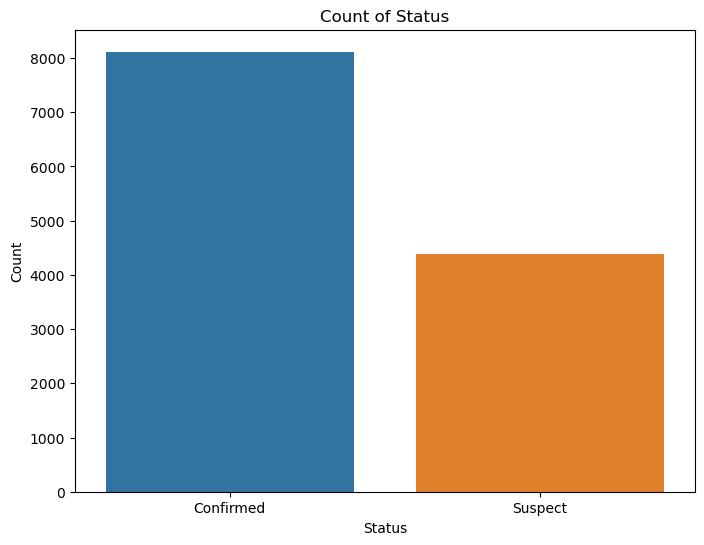

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=food_df, x='Status')
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [34]:
food_df[['Status']].describe()

,Status
count,12500
unique,2
top,Confirmed
freq,8117


In [36]:
food_df['Status'] = food_df['Status'].fillna('Confirmed', inplace = False)

In [38]:
food_df['Status'].isnull().sum()

0

In [29]:
food_df['Illnesses'].isnull().sum()
# עמודה מספר 10 ללא ערכים ריקים

0

In [30]:
food_df['Illnesses'].unique()

array([   4,   26,   25,    3,    2,    5,   47,    8,   79,   34,   10,
          6,   39,   35,   18,   50,   43,   15,  101,   13,   16,   45,
          9,   29,   48,   24,    7,   44,  103,   30,   20,   28,  125,
         23,   56,   72,   11,   40,   27,   12,   46,   53,   65,   71,
        209,   22,   51,  264,  400,   93,   36,  916,  204,   14,  300,
         19,  134,   17,   49,   63,   58,   32,   80,   62,   86,  143,
         21,  200,   33,   38,   41,  128,   66,  318,  270,  258,  250,
         57,   78,  100,   31,   42,   92,  118,  112,   83,   37,   81,
        104,  245,   54,  140,   77,  238,   94,  190,  151,   70,  127,
         85,  177,   52,   73,   55,  256,   82,  187,  126,  460,  157,
         60,  321,  280,   88,   87,  110,  206,  297,  108,  150,  494,
        333,   59,  259,  135,   74,   75,   99,  117,   76,  106,  142,
         96,  107,   95,  736,  132,   89,   68,  221,  235,  188,   61,
         97,  148,  166,  811,  223,  552,  231,  3

In [46]:
food_df['Hospitalizations'].isnull().sum()
# עמודה מספר 11 הצגת מספר הערכים הריקים

395

In [35]:
food_df['Hospitalizations'].unique()

array([  0.,   3.,  nan,   2.,   1.,   6.,   4.,  60.,   5.,   7.,  47.,
        10.,  12.,  14.,  24.,  11.,  17.,  31.,   9., 101.,  13.,  16.,
         8.,  15.,  23.,  29.,  30.,  19.,  18.,  34.,  22.,  58.,  36.,
        43.,  20.,  35.,  25., 129.,  56.,  39.,  21., 103.,  55.,  27.,
       108., 308.,  32.,  71., 166.,  52.,  28.,  50., 143.,  33.,  94.,
        40.,  70., 200.,  48., 204.,  49.])

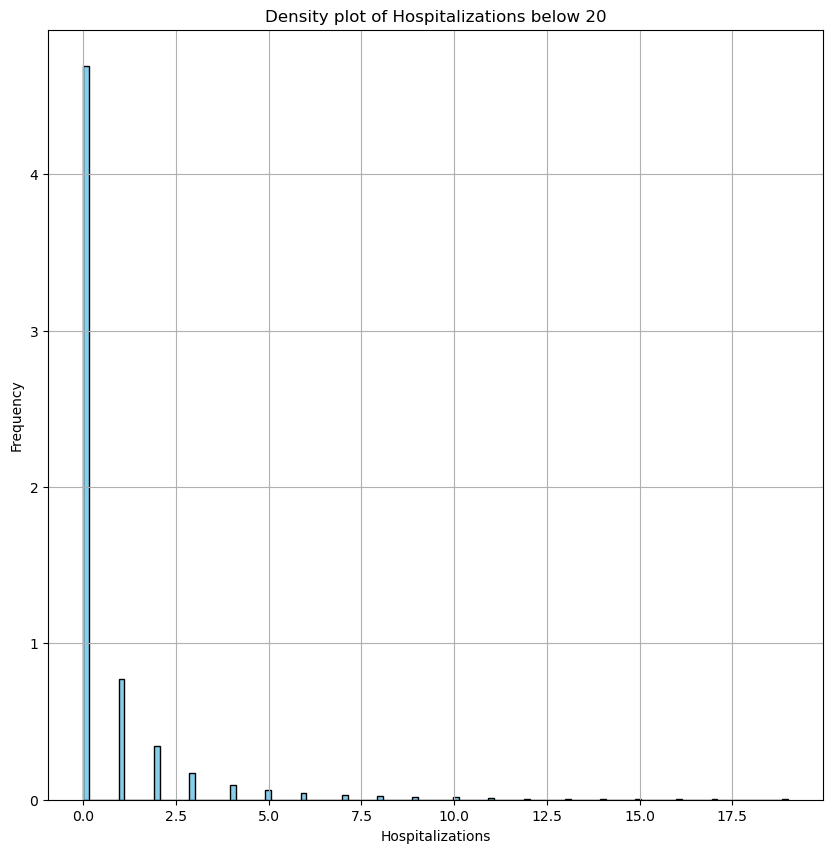

In [7]:
filtered_hospitalizations = food_df['Hospitalizations'][food_df['Hospitalizations'] < 20]
plt.figure(figsize=(10, 10))
plt.hist(filtered_hospitalizations, bins=120, color='skyblue', edgecolor='black', density= True)
plt.title('Density plot of Hospitalizations below 20')
plt.xlabel('Hospitalizations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# חישוב הממוצע של העמודה 'Hospitalizations', תוך התעלמות מערכי NaN
mean_hospitalizations = food_df['Hospitalizations'].mean()

# הערכת p על סמך הממוצע של 'Hospitalizations'
p_estimate = 1 / (mean_hospitalizations + 1)

print(f"הערך המוערך של p: {p_estimate}")

# פונקציה למילוי ערכים חסרים באמצעות התפלגות גיאומטרית
def fill_missing_geometric(series, p):
    # זיהוי הערכים החסרים
    missing_indices = series[series.isnull()].index
    # יצירת דגימות גיאומטריות
    geometric_samples = np.random.geometric(p, size=len(missing_indices))
    # מילוי הערכים החסרים עם הדגימות הגיאומטריות
    series.loc[missing_indices] = geometric_samples
    return series

# מילוי הערכים החסרים בעמודה "Hospitalizations" באמצעות p המוערך
food_df['Hospitalizations'] = fill_missing_geometric(food_df['Hospitalizations'], p_estimate)

# הצגת השורות הראשונות לאחר מילוי הערכים החסרים
print(food_df.head())


הערך המוערך של p: 0.5134714167357084
   Year    Month       State                Location  \
0  1998  January  California              Restaurant   
1  1998  January  California                     NaN   
2  1998  January  California              Restaurant   
3  1998  January  California              Restaurant   
4  1998  January  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112    

C:\Users\NouBe\AppData\Local\Temp\ipykernel_31252\3507913081.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = geometric_samples


In [9]:
# Define the probability of success in a single trial
p =  0.270654020385051

# Function to fill missing values using geometric distribution
def fill_missing_geometric(series, p):
    # Identify missing values
    missing_indices = series[series.isnull()].index
    # Generate geometric samples
    geometric_samples = np.random.geometric(p, size=len(missing_indices))
    # Fill missing values with geometric samples
    series.loc[missing_indices] = geometric_samples
    return series

# Fill missing values in the "Hospitalizations" column
food_df['Hospitalizations'] = fill_missing_geometric(food_df['Hospitalizations'], p)

# Display the first few rows after filling missing values
print(food_df.head())


   Year    Month       State                Location  \
0  1998  January  California              Restaurant   
1  1998  January  California                     NaN   
2  1998  January  California              Restaurant   
3  1998  January  California              Restaurant   
4  1998  January  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112               0.0         0.0  
2       

C:\Users\NouBe\AppData\Local\Temp\ipykernel_31252\3185402328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing_indices] = geometric_samples


In [11]:
food_df['Hospitalizations'].isnull().sum()
# עמודה מספר 11 הצגת מספר הערכים הריקים

0

In [12]:
food_df['Fatalities'].isnull().sum()
# עמודה מספר 12 הצגת מספר הערכים הריקים

3601

In [37]:
food_df['Fatalities'].unique()

array([ 0., nan,  2.,  1., 21.,  3.,  7.,  4.,  8.,  6.,  5.,  9., 33.])

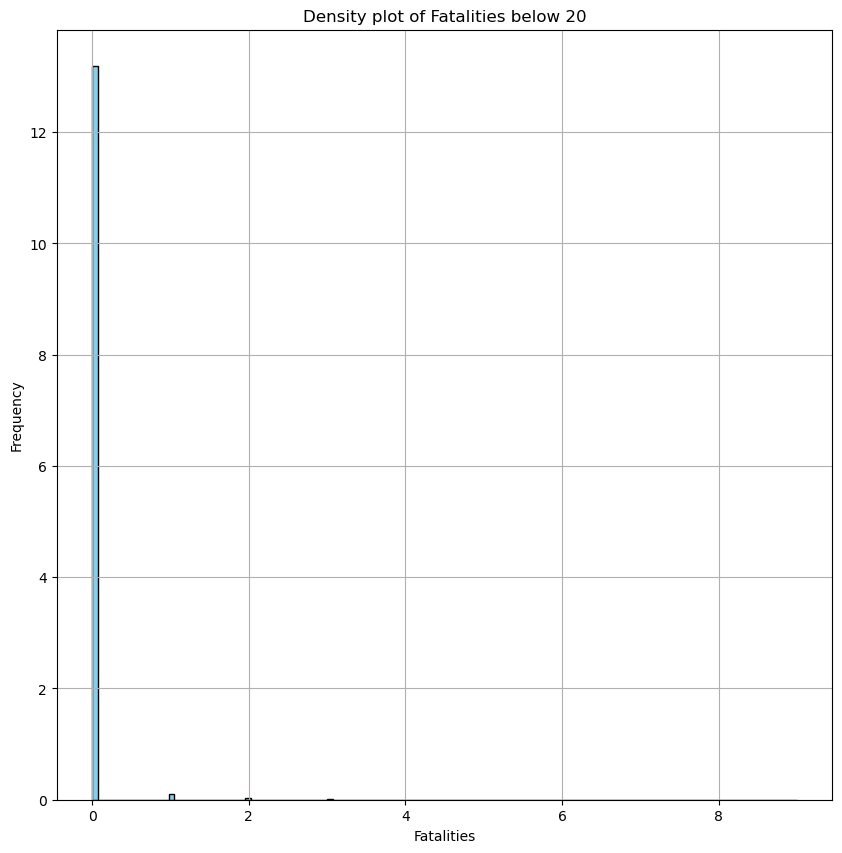

In [17]:
filtered_Fatalities = food_df['Fatalities'][food_df['Fatalities'] < 20]
plt.figure(figsize=(10, 10))
plt.hist(filtered_Fatalities, bins=120, color='skyblue', edgecolor='black', density= True)
plt.title('Density plot of Fatalities below 20')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
filtered_Fatalities.describe()

count    15516.000000
mean         0.018239
std          0.226483
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: Fatalities, dtype: float64

In [20]:
len(filtered_Fatalities)

15516

In [21]:
((filtered_Fatalities == 0).sum() / filtered_Fatalities.size) * 100

98.8785769528229

In [23]:
food_df['Fatalities'] = food_df['Fatalities'].fillna(0, inplace = False)

In [25]:
# עמודה מספר 12 הצגת מספר הערכים הריקים
food_df['Fatalities'].isnull().sum()

0

### <b>3.נוספים </b> <b style='color:#40E0D0'>..</b>

#כותרת2
# <b id = 'Discounts&Sales' > </b> <b style='color:#F05454'>Discounts </b> <b>  lead to sales </b> <b style='color:#F05454'> growth ? </b> <b></b>     

In [21]:
#תת כותרת 2

#כותרת3
# <b id = 'Discounts&Sales' > </b> <b style='color:#F05454'>Discounts </b> <b>  lead to sales </b> <b style='color:#F05454'> growth ? </b> <b></b> 

In [11]:
#תת כותרת 3

#כותרת4
# <b id = 'Discounts&Sales' > </b> <b style='color:#F05454'>Discounts </b> <b>  lead to sales </b> <b style='color:#F05454'> growth ? </b> <b></b> 

In [12]:
#תת כותרת 4